# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [21]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file="./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [22]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) +1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.


Displaying some of the training images


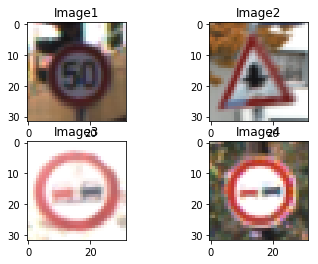

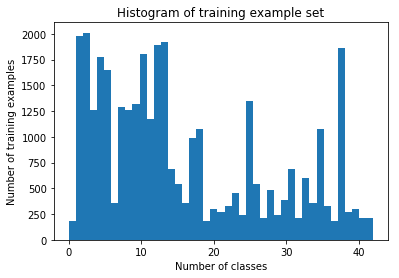

In [23]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

# Visualizations will be shown in the notebook.
idx = np.random.randint(0,n_train,4)
image = X_train[idx]

print ()
print('Displaying some of the training images')

plt.subplot(221),plt.imshow(image[0]),plt.title('Image1')
plt.subplot(222),plt.imshow(image[1]),plt.title('Image2')
plt.subplot(223),plt.imshow(image[2]),plt.title('Image3')
plt.subplot(224),plt.imshow(image[3]),plt.title('Image4')
plt.show()

print ()

# Check how much data do we have for each category.
print ()
n_hist,bins,patches = plt.hist(y_train,n_classes)
plt.xlabel("Number of classes")
plt.ylabel("Number of training examples")
plt.title("Histogram of training example set")
plt.show()

%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [24]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Based on the histogram, Looks like first 19 classes are well represented, but the we dont have a lot of data for the classes 20 - 43
# Lets augment the training data with some additional images. 
# At a minimum, let's say that each classs should have greater than 75% of max_sample_size.
import cv2

def distort_data(x_batch):

    out_x = np.ndarray(x_batch.shape)
    for i in range(len(x_batch)):
        image = x_batch[i]

#         # Randomly flip some images horizontally        
#         if np.random.randint(0,100) > 50  :
#             image = np.fliplr(image)

#        # Randomly flip some images vertically        
#        if np.random.randint(0,100) > 50  :
#            image = np.flipud(image)

        # Rotate images
        angles = [-20,-15,-10,-5,0,5,10,15,20]
        #Select a random angle to rotate the image by
        rows,cols,ch = image.shape
        temp_angle = angles[np.random.randint(0,len(angles))]
        rotMatrix = cv2.getRotationMatrix2D((cols/2,rows/2),temp_angle,1)
        new_image = cv2.warpAffine(image,rotMatrix,(cols,rows))
#        plt.imshow(new_image)
        # Affine transform
        if np.random.randint(0,100) > 50  :
            pts1 = np.float32([[5,25],[25,25],[25,5]])
            pts2 = np.float32([[5,25],[25,25],[20,5]])
            affineMatrix = cv2.getAffineTransform(pts1,pts2)
            new_image = cv2.warpAffine(new_image,affineMatrix,(cols,rows))
#        plt.imshow(new_image)

        if np.random.randint(0,100) > 50  :
            # Perpsective transform
            pts1 = np.float32([[5,25],[25,25],[25,5],[5,5]])
            pts2 = np.float32([[5,25],[20,25],[20,5],[5,5]])
            perspMatrix = cv2.getPerspectiveTransform(pts1,pts2)
            new_image = cv2.warpPerspective(new_image,perspMatrix,(cols,rows))
    #        plt.imshow(new_image)

#         plt.subplot(121),plt.imshow(image),plt.title('Input')
#         plt.subplot(122),plt.imshow(new_image),plt.title('Output')
#         plt.show()

        # Add random noise to the filpped images
#        noise = np.random.normal(scale=0.01,size=(32,32,1))
#        noise = np.empty((32,32,3))
#        noise_low = -2*np.ones((1,3))
#        noise_high = 2*np.ones((1,3))
#        
#        noise = cv2.randu(noise,noise_low,noise_high)
#        noisy_image = image+noise
#        
#        plt.imshow(noisy_image)
        
#        contrast_image = tf.image.random_contrast(flipped_image,lower=0.2,upper=1.8)
        out_x[i] = new_image 
    return out_x



# Start adding augmented data

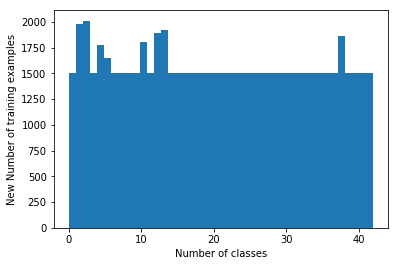

In [25]:
#%% Start adding the augmented data
max_num_samples = max(n_hist)
cutoff_0_1 = 0.75
cutoff          = int(cutoff_0_1*max_num_samples)

for current_class in range(n_classes):
    # See if the samples in this class are less than cutoff_0_1 of max_num_samples
    n_current_class = n_hist[current_class]
    if (n_current_class < cutoff):
        # Get all the training data for the current class
        idx=(y_train==current_class)
        current_class_images = X_train[idx].astype('uint8')
        current_class_labels = y_train[idx] # All these will be same as class number
        # See how many new images do we need to create
        num_new_images = int(cutoff-n_current_class)
        new_idx = np.random.randint(0,n_current_class,num_new_images)
        images_to_distort = current_class_images[new_idx]
        labels_placeholder = current_class * np.ones(num_new_images)
        
        temp_images = distort_data(images_to_distort)
        X_train = np.append(X_train,temp_images,axis = 0).astype('uint8')
        y_train = np.append(y_train,labels_placeholder,axis = 0)

            
# Plot the y_train data again to verify that we have good number of images.
plt.hist(y_train,n_classes)
plt.xlabel("Number of classes")
plt.ylabel("New Number of training examples")
plt.show()


# Now shuffle the training data around, and change the value of n_train
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

n_train = X_train.shape[0]



Displaying one of the grayscaled images


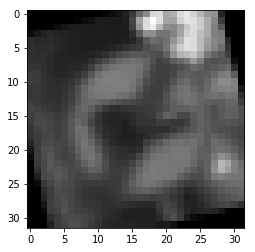

In [26]:
# Preprocessing data
#import cv2

# For training and validation data
# Step 1: Convert  to grayscale
# Step 2: Scale the values from 0-255 to 0.1 to 0.9
def normalize(image):
    new_image = (image/255) * 0.8 + 0.1
    return new_image

def grayscale(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    new_image  = np.reshape(gray_image,(32,32,1)).astype('float32')
    return new_image

X_train_gray = np.ndarray((n_train,32,32,1),dtype='float32')
for image_id in range(0,n_train):
    image = X_train[image_id]
    # Convert to grayscale
    gray_image = grayscale(image)
    new_image = normalize(gray_image)
#     gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#     new_image  = np.reshape(gray_image,(32,32,1)).astype('float32')
#     new_image = new_image/255
    X_train_gray[image_id] = new_image

# Grayscale validation data
X_valid_gray = np.ndarray((n_valid,32,32,1),dtype='float32')
for image_id in range(0,n_valid):
    image = X_valid[image_id]
    # Convert to grayscale
    gray_image = grayscale(image)
    new_image = normalize(gray_image)
#     gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#     new_image  = np.reshape(gray_image,(32,32,1)).astype('float32')
#     new_image = new_image/255
    X_valid_gray[image_id] = new_image

print('Displaying one of the grayscaled images')
plt.imshow(np.reshape(X_train_gray[np.random.randint(0,n_train)],(32,32)),cmap='gray')
plt.show()


### Model Architecture

In [29]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# Set up the hyper parameters
# num_epochs = 20
# batch_size = 128
learning_rate=0.001


tf.reset_default_graph()

weights = {\
           'wc1': [3,3,1,32], # 32x32 to 30x30 to 15x15
           'wc2': [3,3,32,64], # filter 5: 15x15 to 11x11 to 5x5; filter3: 15x15 to  13x13 to 6x6
           'wfc1': [2304,512], # 5x5x64 = 1600 to 512; 6x6x64=2304 to 512
           'wfc2': [512,128],
           'out': [128,n_classes]
           }

biases = {\
          'bc1': [32],
          'bc2': [64],
          'bfc1':[512],
          'bfc2': [128],
          'out': [n_classes]
          }           

def conv_layer(input,weight_array, bias_array,mu=0,sigma=0.1,name="conv"):
    with tf.name_scope(name):

        weight = tf.Variable(tf.truncated_normal(weight_array,mean=mu,stddev=sigma),name='W')         
        bias   = tf.Variable(tf.zeros(bias_array),name='b')

        wx = tf.nn.conv2d(input,weight,strides=[1,1,1,1],padding='VALID')
        wx_b = tf.nn.bias_add(wx,bias)
        act = tf.nn.relu(wx_b)

        tf.summary.histogram('weights',weight)
        tf.summary.histogram('biases',bias)
        tf.summary.histogram('activations',act)

        return act

def fully_connected_layer(input,weight_array,bias_array,mu=0,sigma=0.1,name='fc'):
    with tf.name_scope(name):
        weight = tf.Variable(tf.truncated_normal(weight_array,mean=mu,stddev=sigma),name='W')         
        bias   = tf.Variable(tf.zeros(bias_array),name='b')

        wx_b = tf.matmul(input,weight + bias)
        act = tf.nn.relu(wx_b)
        tf.summary.histogram('weights',weight)
        tf.summary.histogram('biases',bias)
        tf.summary.histogram('activations',act)

        return act    

def dropout_layer(input,keep_prob,name='dp'):
    with tf.name_scope(name):
        out = tf.nn.dropout(input,keep_prob)
        return out

def last_layer(input,weight_array,bias_array,mu=0,sigma=0.1,name='out'):
    with tf.name_scope(name):
        weight = tf.Variable(tf.truncated_normal(weight_array,mean=mu,stddev=sigma),name='W')         
        bias   = tf.Variable(tf.zeros(bias_array),name='b')

        logits = tf.matmul(input,weight) + bias

        tf.summary.histogram('weights',weight)
        tf.summary.histogram('biases',bias)

        return logits

def myConvNet(x):

    conv1 = conv_layer(x,weights['wc1'],biases['bc1'],name='conv1')
    # Max pooling
    pool1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Conv layer 2
    conv2 = conv_layer(pool1,weights['wc2'],biases['bc2'],name='conv2')    
    # Max pooling
    pool2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Flatten the output    
    flat = tf.contrib.layers.flatten(pool2)

    # fully connected 1
    fc1 = fully_connected_layer(flat,weights['wfc1'], biases['bfc1'],name='fc1')

    #Dropout layer 1
    dp1  = dropout_layer(fc1,keep_prob,name='dropout1')

    # fully connected 2
    fc2 = fully_connected_layer(dp1,weights['wfc2'],biases['bfc2'],name='fc2')

    # Dropout layer 2
    dp2 = dropout_layer(fc2, keep_prob,name='dropout2')

    # Output
    logits = last_layer(dp2,weights['out'],biases['out'],name = 'out')

    return logits

    
#%% Placeholders for the inputs    
x = tf.placeholder(tf.float32,(None,32,32,1),name='x_input')
y = tf.placeholder(tf.int32,(None),name='labels')
one_hot_y = tf.one_hot(y,n_classes)


# Keep prob for dropout layer
keep_prob = tf.placeholder(tf.float32)


#%% Training pipeline
with tf.name_scope('Model'):
    logits = myConvNet(x)

with tf.name_scope('xent'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)


with tf.name_scope('AdamOptimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_operation = optimizer.minimize(loss_operation)


#%% Model Evaluation
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.arg_max(logits,1),tf.arg_max(one_hot_y,1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    
# Add some summaries for Tensorboard
tf.summary.scalar('cross_entropy',loss_operation)
training_summary   = tf.summary.scalar('training_accuracy',accuracy_operation)
validation_summary = tf.summary.scalar('validation_accuracy',accuracy_operation)
tf.summary.image('input_images',X_train_gray,3)
merged_summary = tf.summary.merge_all()



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# path for saving tensorboard data
log_path = './tensorboard/'

# File for saving model
saver = tf.train.Saver()


# Setup the parameter string for saving the data for tensorflow
def make_hyperparam_string(learning_rate,batch_size,num_epochs):
    name = "lr_{:.0E}_batch_{}_epochs_{}".format(learning_rate,batch_size,num_epochs)
    return name

# Not changing the number of epochs for the moment. 
num_epochs = 20

for learning_rate in [1e-3]:
    for batch_size in [100]:
        param_string = make_hyperparam_string(learning_rate,batch_size,num_epochs)
        print()
        print ("Starting the run for params: {}".format(param_string))
        
        # Run the model with the param set
#         my_deepnet(learning_rate,batch_size,num_epochs,param_string)
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            filename = log_path + param_string

            writer = tf.summary.FileWriter(filename,tf.get_default_graph())

            print ('Training...')
            print()
            for epoch in range(num_epochs):
                train_x,train_y = shuffle(X_train_gray,y_train)
                total_batches = int(n_train/batch_size)

                for i in range(total_batches):          
                    offset = i*batch_size
                    x_batch,y_batch = train_x[offset:offset+batch_size],train_y[offset:offset+batch_size]

                    _ = sess.run([training_operation],
                                 feed_dict={x:x_batch,y:y_batch,keep_prob:0.5})

                #Calculate the training and validation accuracy at the end of each epoch                
                training_acc,train_summ,out_summ = sess.run([accuracy_operation,training_summary,merged_summary],feed_dict={x:x_batch,y:y_batch,keep_prob:0.5})
                writer.add_summary(out_summ,epoch+1)            

                validation_acc,valid_summ = sess.run([accuracy_operation,validation_summary],
                                                     feed_dict={x:X_valid_gray,y:y_valid,keep_prob:1})
                writer.add_summary(valid_summ,epoch+1)

                print("Epoch: {}".format(epoch+1))
                print('Training Accuracy:{:.3f}'.format(training_acc),"Validation Accuracy: {:.3f}".format(validation_acc))

            save_file = './{}.ckpt'.format(param_string)
            saver.save(sess, save_file)
            print(save_file)
            print("Model: {}.ckpt saved".format(param_string))



        
    print ("Training complete")
    #        



Starting the run for params: lr_1E-03_batch_100_epochs_20
Training...

Epoch: 1
Training Accuracy:0.590 Validation Accuracy: 0.759
Epoch: 2
Training Accuracy:0.800 Validation Accuracy: 0.859
Epoch: 3
Training Accuracy:0.830 Validation Accuracy: 0.918
Epoch: 4
Training Accuracy:0.930 Validation Accuracy: 0.926
Epoch: 5
Training Accuracy:0.960 Validation Accuracy: 0.940
Epoch: 6
Training Accuracy:0.870 Validation Accuracy: 0.941
Epoch: 7
Training Accuracy:0.960 Validation Accuracy: 0.943
Epoch: 8
Training Accuracy:0.990 Validation Accuracy: 0.952
Epoch: 9
Training Accuracy:0.970 Validation Accuracy: 0.955
Epoch: 10
Training Accuracy:0.950 Validation Accuracy: 0.951
Epoch: 11
Training Accuracy:0.960 Validation Accuracy: 0.959
Epoch: 12
Training Accuracy:0.970 Validation Accuracy: 0.961
Epoch: 13
Training Accuracy:0.960 Validation Accuracy: 0.954
Epoch: 14
Training Accuracy:1.000 Validation Accuracy: 0.960
Epoch: 15
Training Accuracy:0.960 Validation Accuracy: 0.963
Epoch: 16
Training Acc

Based on the above results, seems like we should use the learning rate of 0.001 and batch size of 100, given that epoch size has been fixed to 20. 

It seemed that if the number of epochs was increased, then the slower learning rate of 1E-4 might have given better results in with the validation test set.

In [30]:
# Load the best model:
saver = tf.train.Saver()
save_file = './lr_1E-03_batch_100_epochs_20.ckpt'
with tf.Session() as sess:
    saver.restore(sess,save_file)
    test_accuracy = sess.run(accuracy_operation,feed_dict={x:X_valid_gray,y:y_valid,keep_prob:1})
print ("Test Accuracy = {:.3f}".format(test_accuracy))
       

Test Accuracy = 0.959


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

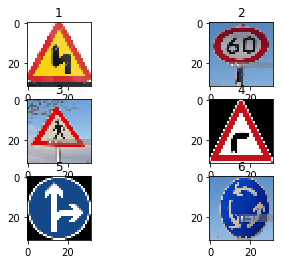

New Images data shape:  (6, 32, 32, 3)


In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Get the new images 

import os
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

additional_pics = os.listdir("./additional_images/additional_images")
# Resize these images to be 32x32
dim = (32,32)
internet_images=[]
for im_name in additional_pics:
    filename = './additional_images/additional_images/' + im_name
    im = cv2.imread(filename)
    resized_image = cv2.resize(im,dim,cv2.INTER_AREA)
    resized_image = cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
    internet_images.append(resized_image)

# Display the images    
for i in range(6):
    plt.subplot(3,2,i+1), plt.imshow(internet_images[i]), plt.title(i+1)
plt.show()

# Convert to shape similar to the X_train data
internet_image_array = np.array(internet_images)
print("New Images data shape: ",image_array.shape)


### Predict the Sign Type for Each Image

Displaying one of the grayscaled images


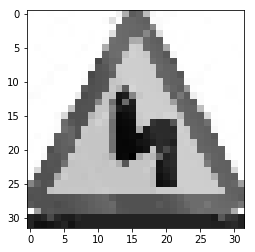

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

n_internet = 6

internet_gray = np.ndarray((n_internet,32,32,1),dtype='float32')
for image_id in range(0,n_internet):
    image = internet_image_array[image_id]
    # Convert to grayscale
    gray_image = grayscale(image)
    new_image = normalize(gray_image)
#     gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#     new_image  = np.reshape(gray_image,(32,32,1)).astype('float32')
#     new_image = new_image/255
    internet_gray[image_id] = new_image

print('Displaying one of the grayscaled images')
plt.imshow(np.reshape(internet_gray[np.random.randint(0,n_internet)],(32,32)),cmap='gray')
plt.show()

# Pass these images through the trained neural net. i.e get the logits.
# Load the best model:
# import tensorflow as tf

# saver = tf.train.Saver()
# save_file = './lr_1E-03_batch_100_epochs_20.ckpt'
internet_y = np.array([19,3,27,20,36,40])

with tf.Session() as sess:
    saver.restore(sess,save_file)
#     image_predictions = sess.run(logits,feed_dict={x:internet_gray,keep_prob:1})
    image_predictions,internet_accuracy = sess.run([logits,accuracy_operation],feed_dict={x:internet_gray,y:internet_y,keep_prob:1})
    #     print (output)
# print(image_predictions)

### Analyze Performance

In [51]:
### Calculate the accuracy for these 5 new images. 
# Create the label matrix
# internet_y = np.array([19,3,27,20,36,40])
#     internet_accuracy = sess.run(accuracy_operation,feed_dict={x:internet_gray,y:internet_y,keep_prob:1})
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    top2 = sess.run(tf.nn.top_k(tf.constant(image_predictions), k = 5))
print(top2)

TopKV2(values=array([[  1.55334864e+01,   1.46024008e+01,   2.53338909e+00,
          2.19292426e+00,   1.28182626e+00],
       [  2.74319434e+00,   2.68011069e+00,   6.74973309e-01,
          4.30808067e-02,  -9.52711344e-01],
       [  1.49037600e+01,   1.32790241e+01,  -1.33917487e+00,
         -1.87095964e+00,  -2.42042994e+00],
       [  3.76546288e+01,   2.00732384e+01,   1.12071304e+01,
          5.22217989e+00,   3.28147745e+00],
       [  5.26239624e+01,   1.03446598e+01,   2.99103856e+00,
          2.81992674e+00,  -1.33986306e+00],
       [  1.14431801e+01,  -1.23067796e+00,  -1.50748301e+00,
         -1.80298543e+00,  -1.98219669e+00]], dtype=float32), indices=array([[11, 21, 30,  7, 12],
       [ 9, 23,  0, 36, 40],
       [18, 26, 28,  4, 24],
       [20, 41, 23,  9, 42],
       [36, 35, 34,  9, 37],
       [40, 33, 42, 37, 17]], dtype=int32))


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 